**Image Instance segmentation using U-Net**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Changing names and folder structure


In [ ]:
#Run for First time for Augmenting images and masks respectively
!pip install clodsa

In [ ]:
##FOR Running First time to change names of the images
#changing names of the images
import os
for count, filename in enumerate(os.listdir("/content/drive/My Drive/crypt/orig/images")): 
    firstname = filename
    filename = filename[:-9]
    filename = filename +'.png' 
    src ='/content/drive/My Drive/crypt/orig/images/'+ firstname 
    dst ='/content/drive/My Drive/crypt/orig/images/'+ filename     
    # rename() function will 
    # rename all the files 
    os.rename(src, dst) 

for count, filename in enumerate(os.listdir("/content/drive/My Drive/crypt/orig/labels")): 
    firstname = filename
    filename = filename[:-6]
    filename = filename +'.png' 
    src ='/content/drive/My Drive/crypt/orig/labels/'+ firstname 
    dst ='/content/drive/My Drive/crypt/orig/labels/'+ filename     
    # rename() function will 
    # rename all the files 
    os.rename(src, dst) 

In [ ]:
#Calling clodsa api for augmenting images
!clodsa building_folder_folder_linear.json

In [ ]:
import os, os.path, shutil

In [ ]:
folder_path = "/content/drive/My Drive/crypt/"

images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


In [ ]:
#Renaming the file names
#For running only on the first time.
#Changing the images into different directories
import os 
import shutil 

image_type = ['orig', 'crypt']
files_list = images
# Check if directory exists. If not, create it
for folder in image_type:
    if os.path.isdir(f"/content/drive/My Drive/crypt/{folder}"):
        pass
    else:
        os.mkdir(f"/content/drive/My Drive/crypt/{folder}")

# Move files
for fname in files_list:  # traverse the files list
    for img in image_type: # compare which type it matches to
        if img in fname:
            shutil.move(f"/content/drive/My Drive/crypt/{fname}", f"/content/drive/My Drive/crypt/{img}/{fname}") # move it to the respective directory
            break 

# Print contents of each folder
for folder in image_type:
    print(f"\n\nContents of {folder}::::")
    print(os.listdir(f"/content/drive/My Drive/crypt/{folder}"))



Contents of orig::::
['PAT_01_03_orig.png', 'PAT_01_01_orig.png', 'PAT_01_02_orig.png', 'PAT_01_04_orig.png', 'PAT_01_06_orig.png', 'PAT_01_05_orig.png', 'PAT_03_01_orig.png', 'PAT_04_02_orig.png', 'PAT_03_02_orig.png', 'PAT_04_01_orig.png', 'PAT_06_03_orig.png', 'PAT_06_02_orig.png', 'PAT_06_01_orig.png', 'PAT_05_01_orig.png', 'PAT_06_04_orig.png', 'PAT_05_02_orig.png', 'PAT_06_06_orig.png', 'PAT_06_05_orig.png', 'PAT_08_01_orig.png', 'PAT_07_01_orig.png', 'PAT_06_07_orig.png', 'PAT_08_02_orig.png', 'PAT_09_02_orig.png', 'PAT_09_04_orig.png', 'PAT_09_01_orig.png', 'PAT_09_03_orig.png', 'PAT_10_01_orig.png', 'PAT_10_02_orig.png', 'PAT_11_01_orig.png', 'PAT_11_02_orig.png', 'PAT_14_01_orig.png', 'PAT_16_01_orig.png', 'PAT_14_02_orig.png', 'PAT_13_01_orig.png', 'PAT_14_03_orig.png', 'PAT_13_02_orig.png', 'PAT_16_02_orig.png', 'PAT_16_04_orig.png', 'PAT_16_03_orig.png', 'PAT_17_01_orig.png', 'PAT_17_02_orig.png', 'PAT_17_03_orig.png', 'PAT_18_01_orig.png', 'PAT_21_01_orig.png', 'PAT_22_

# Data Import and Augmentation

Implementing the code:

In [ ]:
## Importing required libraries
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## Seeding 

seed = 1

#images
image_size=256



In [ ]:
data_gen_args = dict(rescale=1./255,
                     rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip=True,
                     shear_range=0.2,
                     validation_split=0.2
                    )
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

In [ ]:
import PIL
from PIL import Image

img_size = 256

image_args = dict(seed=seed,
    batch_size=32,
    shuffle=True,
    class_mode=None,
    target_size=(img_size, img_size),
    color_mode='rgb')

mask_args = dict(seed=seed,
    batch_size=32,
    class_mode=None,
    shuffle=True,
    target_size=(img_size, img_size), 
    color_mode='grayscale')


image = '/content/drive/My Drive/crypt/Out/images/'
masks = '/content/drive/My Drive/crypt/Out/labels/'

# combine generators into one which yields image and masks
train_generator = zip(image_datagen.flow_from_directory(**image_args, directory=image),  
                      mask_datagen.flow_from_directory(**mask_args, directory=masks))

valid_generator = zip(image_datagen.flow_from_directory(**image_args, directory="/content/drive/My Drive/crypt/orig/images"),  
                      mask_datagen.flow_from_directory(**mask_args, directory="/content/drive/My Drive/crypt/orig/labels"))

Found 372 images belonging to 1 classes.
Found 372 images belonging to 1 classes.
Found 93 images belonging to 1 classes.
Found 93 images belonging to 1 classes.


In [ ]:
img9, mask9 = next(train_generator)

In [ ]:
imgval, maskval = next(valid_generator)

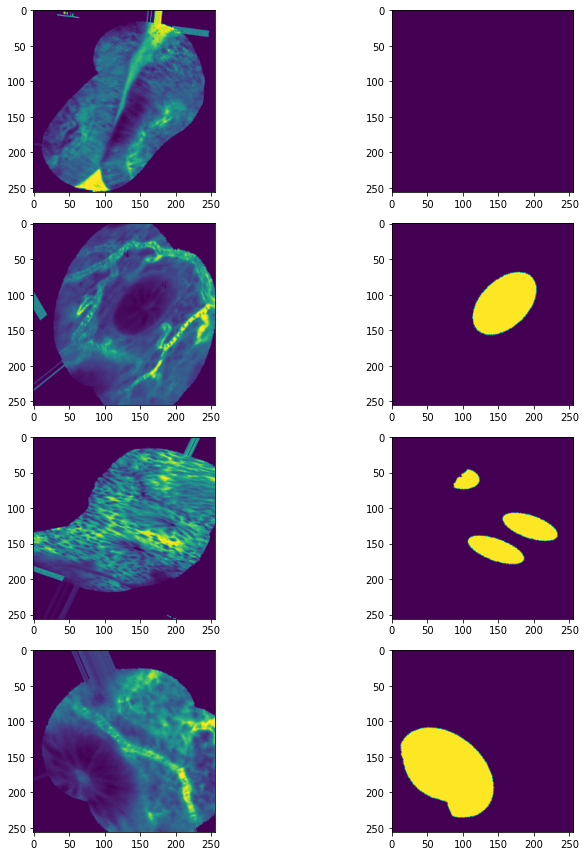

In [ ]:
fig=plt.figure(figsize=(12,12))
columns = 2
rows = 4
counter = 0
c = 0
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    if counter%2 == 0:
        plt.imshow(imgval[c][:,:,0])
    else:
        plt.imshow(maskval[c][:,:,0])
        c = c + 1
    counter = counter + 1
    

plt.tight_layout()
plt.savefig('augmented.png')
plt.show()

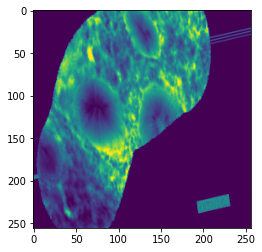

In [ ]:
plt.imshow(img9[10][:,:,0])

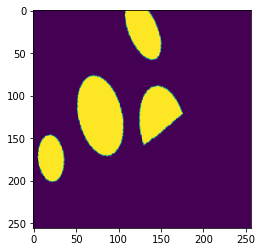

In [ ]:
plt.imshow(mask9[10][:,:,0])

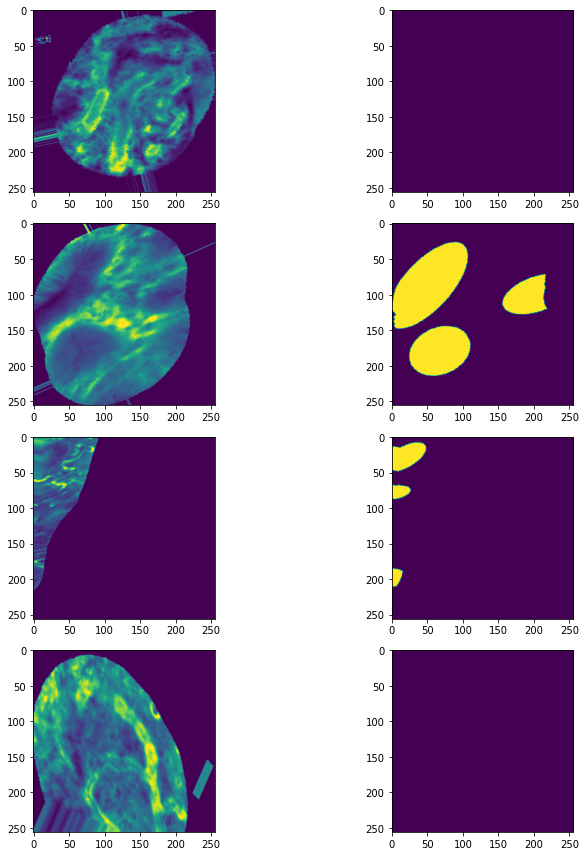

In [ ]:
fig=plt.figure(figsize=(12,12))
columns = 2
rows = 4
counter = 0
c = 0
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    if counter%2 == 0:
        plt.imshow(img9[c][:,:,0])
    else:
        plt.imshow(mask9[c][:,:,0])
        c = c + 1
    counter = counter + 1
    

plt.tight_layout()
plt.savefig('augmented.png')
plt.show()

# U-Net Model


In [ ]:
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

In [ ]:
import tensorflow as tf

def dice_coef(y_true, y_pred):
    """
    write our own dice_coeficcient metric
    """
    y_true = tf.round(tf.reshape(y_true, [-1]))
    y_pred = tf.round(tf.reshape(y_pred, [-1]))
    isct = tf.reduce_sum(y_true * y_pred)
    return 2 * isct / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred))

In [ ]:
def UNet():
    #f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    #256->128
    c1 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1, kernel_initializer = 'he_normal', activation="relu")(inputs)
    c1 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c1)
    p1 = keras.layers.MaxPool2D((2, 2), (2, 2))(c1)
    #128 -> 64
    c2 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p1)
    c2 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c2)
    p2 = keras.layers.MaxPool2D((2, 2), (2, 2))(c2)

    #64 -> 32
    c3 = keras.layers.Conv2D(64, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p2)
    c3 = keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c3)
    p3 = keras.layers.MaxPool2D((2, 2), (2, 2))(c3)
    
    #32 -> 16
    c4 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p3)
    c4 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c4)
    drop4 = keras.layers.Dropout(0.5)(c4)
    p4 = keras.layers.MaxPool2D((2, 2), (2, 2))(drop4)
    
    bn = keras.layers.Conv2D(256, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p4)
    bn = keras.layers.Conv2D(256, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(bn)
    drop5 = keras.layers.Dropout(0.5)(bn)
   
    #16->32
    us1 = keras.layers.UpSampling2D((2, 2))(drop5)
    concat1 = keras.layers.Concatenate()([us1, c4])
    u1 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat1)
    u1 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u1)
    
    #32->64
    us2 = keras.layers.UpSampling2D((2, 2))(u1)
    concat2 = keras.layers.Concatenate()([us2, c3])
    u2 = keras.layers.Conv2D(64, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat2)
    u2 = keras.layers.Conv2D(64, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u2)
    
    #64->128
    us3 = keras.layers.UpSampling2D((2, 2))(u2)
    concat3 = keras.layers.Concatenate()([us3, c2])
    u3 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat3)
    u3 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u3)
    
    #128->256
    us4 = keras.layers.UpSampling2D((2, 2))(u3)
    concat4 = keras.layers.Concatenate()([us4, c1])
    u4 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat4)
    u4 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u4)
    
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[dice_coef])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 16) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator, steps_per_epoch=100, validation_steps=16,epochs=40)

Epoch 1/40
100/100 [==============================] - 330s 3s/step - loss: 0.2470 - dice_coef: 0.0000e+00 - val_loss: 0.2586 - val_dice_coef: 0.0000e+00
Epoch 2/40
100/100 [==============================] - 180s 2s/step - loss: 0.2254 - dice_coef: 0.0000e+00 - val_loss: 0.2386 - val_dice_coef: 0.0000e+00
Epoch 3/40
100/100 [==============================] - 178s 2s/step - loss: 0.2059 - dice_coef: 0.2427 - val_loss: 0.2403 - val_dice_coef: 0.1161
Epoch 4/40
100/100 [==============================] - 179s 2s/step - loss: 0.1853 - dice_coef: 0.4807 - val_loss: 0.2207 - val_dice_coef: 0.3952
Epoch 5/40
100/100 [==============================] - 179s 2s/step - loss: 0.1749 - dice_coef: 0.5288 - val_loss: 0.2237 - val_dice_coef: 0.2490
Epoch 6/40
100/100 [==============================] - 180s 2s/step - loss: 0.1651 - dice_coef: 0.5604 - val_loss: 0.2017 - val_dice_coef: 0.5008
Epoch 7/40
100/100 [==============================] - 178s 2s/step - loss: 0.1563 - dice_coef: 0.6001 - val_loss: 

dict_keys(['loss', 'dice_coef', 'val_loss', 'val_dice_coef'])


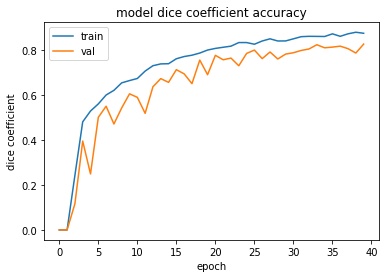

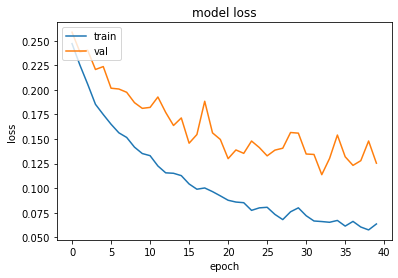

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coefficient accuracy')
plt.ylabel('dice coefficient')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('/content/Unet-420.h5')

In [ ]:
## Save the Weights
model.save_weights("/content/drive/My Drive/crypt/model-weights/Unet-420-87.h5")

# Results


In [ ]:
## Dataset for prediction
img, mask = next(valid_generator)

In [ ]:
result = model.predict(img[3][np.newaxis, :])

Text(0.5, 1.0, 'Original Image')

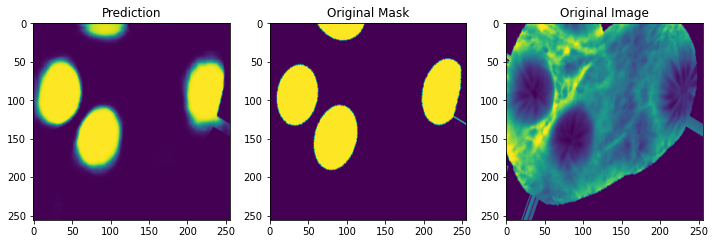

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(result[0,:,:,0])
ax1.set_title('Prediction')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(mask[3,:,:,0])
ax2.set_title('Original Mask')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img[3,:,:,0])
ax3.set_title('Original Image')


In [ ]:
#Dice coeffcient value of the prections
dc= dice_coef(mask[3,:,:,0],result[0,:,:,0] )
print(float(dc))

0.9411507248878479


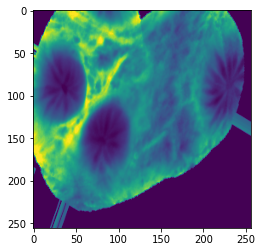

In [ ]:
plt.imshow(img[3,:,:,0])

In [ ]:
dc= dice_coef(mask[3,:,:,0],result[0,:,:,0] )
print(float(dc))

In [ ]:
print(float(dc))

0.9411507248878479


In [ ]:
import pandas as pd

Mask RCNN model - Transfer Learning



In [ ]:
import os
import cv2
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops


In [ ]:
mask_0 = cv2.imread('/content/drive/My Drive/crypt/orig/labels/labels/PAT_01_01.png')

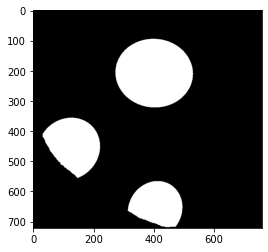

In [ ]:
plt.imshow(mask_0)

In [ ]:
import imageio

In [ ]:
 import imageio
 mymask = imageio.imread('/content/drive/My Drive/crypt/orig/labels/labels/PAT_03_01.png')
 myimage = imageio.imread('/content/drive/My Drive/crypt/orig/images/images/PAT_03_01.png')


Image pp1
Found bbox (104, 868, 343, 1091)
Found bbox (130, 111, 267, 432)
Found bbox (405, 81, 621, 321)
Found bbox (456, 367, 692, 611)


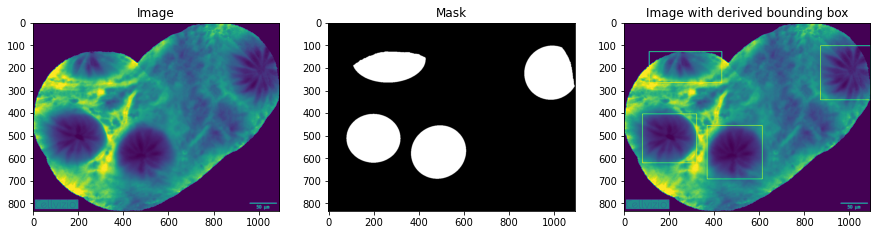

In [ ]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
    img_0 = cv2.imread('/content/drive/My Drive/crypt/orig/labels/labels/PAT_03_01.png')

    lbl_0 = label(mymask) 
    props = regionprops(lbl_0)
    myimage2 = myimage.copy()
    print ('Image', 'pp1')
    for prop in props:
        print('Found bbox', prop.bbox)
        cv2.rectangle(myimage, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


    ax1.imshow(myimage2)
    ax1.set_title('Image')
    ax2.set_title('Mask')
    ax3.set_title('Image with derived bounding box')
    ax2.imshow(img_0[...,0], cmap='gray')
    ax3.imshow(myimage)
    plt.show()

Mask RCNN is implemented in the next notebook
